Работать будем с датасетом ["Credit Score Classification"](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/)

Импорт необходимых библотек:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

## EDA

Теперь посмотрим на данные и произведём первичную обработку.

In [2]:
data = pd.read_csv('data/train.csv', low_memory=False)

data.shape

(100000, 28)

In [3]:
data.sample(10).T

,89153,58956,97208,55066,51764,3191,28531,92972,429,45876
ID,0x22063,0x16f72,0x24f96,0x158a8,0x1454e,0x28b1,0xbd2d,0x236c2,0x1883,0x122ce
Customer_ID,CUS_0x853c,CUS_0x8e5a,CUS_0xb407,CUS_0x4946,CUS_0x2a46,CUS_0x3fa8,CUS_0x17ec,CUS_0xaf7d,CUS_0x9ce6,CUS_0xb39f
Month,February,May,January,March,May,August,April,May,June,May
Name,Jeb Blounti,Kerberl,Haricht,Fionam,Andreaa,Kumarp,Billz,NaN,Ekr,NaN
Age,47,38,49,41,32,40,38,53,43,42
SSN,068-17-0388,718-48-1833,602-64-4725,121-29-4094,295-98-3299,283-56-6375,853-62-7450,540-49-8635,101-11-3105,262-96-1321
Occupation,Architect,Developer,Manager,Architect,_______,Writer,Architect,Architect,Developer,Developer
Annual_Income,46449.98_,57818.72,59412.78,20346.15,59641.5,177243.92,30813.68,112853.22,123732.32_,18648.38
Monthly_Inhand_Salary,4081.831667,4864.226667,NaN,1901.5125,4974.125,NaN,2289.806667,9552.435,10416.026667,1804.031667
Num_Bank_Accounts,3,7,4,10,8,4,3,2,4,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
def uni_zero_null_stats(df):
    df_T = df.T
    df_size = df.shape[0]
    df_info = pd.DataFrame()
    df_info['num_uni'] = df_T.stack().groupby(level=0).nunique()
    df_info['%_uni'] = round(df_info['num_uni']/df_size*100, 2)
    df_info['num_zero'] = (df_T == 0).astype(int).sum(axis=1)
    df_info['%_zero'] = round(df_info['num_zero']/df_size*100, 2)
    df_info['num_null'] = df_T.isnull().sum(axis=1)
    df_info['%_null'] = round(df_info['num_null']/df_size*100, 2)
    df_info.sort_values(by = "%_null", ascending = True)
    return df_info

uni_zero_null_stats(data)

,num_uni,%_uni,num_zero,%_zero,num_null,%_null
Age,1788,1.79,0,0.00,0,0.00
Amount_invested_monthly,91049,91.05,0,0.00,4479,4.48
Annual_Income,18940,18.94,0,0.00,0,0.00
Changed_Credit_Limit,4384,4.38,0,0.00,0,0.00
Credit_History_Age,404,0.40,0,0.00,9030,9.03
Credit_Mix,4,0.00,0,0.00,0,0.00
Credit_Score,3,0.00,0,0.00,0,0.00
Credit_Utilization_Ratio,100000,100.00,0,0.00,0,0.00
Customer_ID,12500,12.50,0,0.00,0,0.00
Delay_from_due_date,73,0.07,1195,1.20,0,0.00


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Langep,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,36585.12,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0


Как можно заметить, датасет не совсем чистый, много где есть как и пропущенные значения, так и откровенные выбросы. При этом есть очевидно лишние колонки, как `SSN`, например. А `Credit_History_Age` хочется привести к численному виду.

Приступим к обработке датасета, нужно привести его к "чистому" виду. Практически каждую колонку придётся отлаживать вручную, универсального способа для всех тут просто нет. Объекты с пропущенными значениями придётся выкинуть, с таким обилием признаков "подгадать" что там должно было быть, не представляется возможным.

In [7]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_from_

In [8]:
def fix_Age(column: pd.Series) -> pd.Series:
    return column.apply(lambda x: int(x.split('_')[0]))

def fix_Annual_Income(column: pd.Series):
    return column.apply(lambda x: float(x.split('_')[0]))

def fix_Num_of_Loan(column: pd.Series):
    return column.apply(lambda x: int(x.split('_')[0]))

def fix_Type_of_Loan(column: pd.Series):
    return column.str.replace("and ", "", regex=False).str.replace(",", "", regex=False).str.replace(" Loan", "", regex=False).str.replace("Not Specified", "", regex=False)

def fix_Num_of_Delayed_Payment(column: pd.Series):
    def fix_num_of_delayed_pay(x):
        num = int(x.split('_')[0])
        if num < 0:
            return 0
        else:
            return num
    return column.apply(fix_num_of_delayed_pay)

def fix_Changed_Credit_Limit(column: pd.Series) -> pd.Series:
    valid_values = column[column.str.strip() != ''].apply(lambda x: x.split('_')[0]).replace('', pd.NA).dropna()
    if valid_values.empty:
        mode_value = 0.0
    else:
        mode_value = float(valid_values.mode()[0])

    return column.apply(lambda x: float(x.split('_')[0]) if x.strip() != '' and x.split('_')[0] != '' else mode_value)

def fix_Outstanding_Debt(column: pd.Series):
    return column.apply(lambda x: float(x.split('_')[0]))

def to_months(string: str):
    y = int(string.split(' ')[0])
    m = int(string.split(' ')[3])
    return y*12 + m

def fix_Credit_History_Age(column: pd.Series):
    return column.apply(to_months)

def Amount_invested_monthly(column: pd.Series):
    valid_values = column[column.str.strip() != ''].apply(lambda x: x.split('_')[0]).replace('', pd.NA).dropna()
    if valid_values.empty:
        mode_value = 0.0
    else:
        mode_value = float(valid_values.mode()[0])

    return column.apply(lambda x: float(x.split('_')[0]) if x.strip() != '' and x.split('_')[0] != '' else mode_value)


def fix_Monthly_Balance(column: pd.Series):
    valid_values = column[column.str.strip() != ''].apply(lambda x: x.split('_')[0]).replace('', pd.NA).dropna()
    if valid_values.empty:
        mode_value = 0.0
    else:
        mode_value = float(valid_values.mode()[0])

    return column.apply(lambda x: float(x.split('_')[0]) if x.strip() != '' and x.split('_')[0] != '' else mode_value)

def fix_Payment_of_Min_Amount(column: pd.Series):
    return column.apply(lambda x: 1 if x == 'Yes' else 0)

def fix_Credit_Score(column: pd.Series):
    def fix_credit_score(x):
        if x == 'Good':
            return 1
        elif x == 'Standard':
            return 0
        else:
            return -1
    return column.apply(fix_credit_score)

In [9]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments', '!@9#%8',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [10]:
data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [11]:
data.drop(data[data['Payment_Behaviour'] == '!@9#%8'].index, inplace=True)
data.drop(data[data['Credit_Mix'] == '_'].index, inplace=True)
data.drop(data[data['Type_of_Loan'] == 'Not Specified'].index, inplace=True)

Уберём также ненужные столбцы.

In [12]:
data.drop(columns=['Customer_ID', 'ID', 'SSN', 'Month', 'Name'], inplace=True)

In [13]:
def fix_DataFrame(df: pd.DataFrame):
    df['Age'] = fix_Age(df['Age'])
    df['Annual_Income'] = fix_Annual_Income(df['Annual_Income'])
    df['Num_of_Loan'] = fix_Num_of_Loan(df['Num_of_Loan'])
    df['Type_of_Loan'] = fix_Type_of_Loan(df['Type_of_Loan'])
    df['Num_of_Delayed_Payment'] = fix_Num_of_Delayed_Payment(df['Num_of_Delayed_Payment'])
    df['Changed_Credit_Limit'] = fix_Changed_Credit_Limit(df['Changed_Credit_Limit'])
    df['Outstanding_Debt'] = fix_Outstanding_Debt(df['Outstanding_Debt'])
    df['Credit_History_Age'] = fix_Credit_History_Age(df['Credit_History_Age'])
    df['Amount_invested_monthly'] = Amount_invested_monthly(df['Amount_invested_monthly'])
    df['Monthly_Balance'] = fix_Monthly_Balance(df['Monthly_Balance'])
    df['Credit_Score'] = fix_Credit_Score(df['Credit_Score'])
    df['Payment_of_Min_Amount'] = fix_Payment_of_Min_Amount(df['Payment_of_Min_Amount'])
    return df

In [14]:
data = fix_DataFrame(data)

Теперь можно посмотреть на обработанные данные.

In [15]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,38591.0,NaN,NaN,NaN,114.398979,705.735749,-500.0,24.0,33.0,42.0,8682.0
Occupation,38591,16,_______,2715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,38591.0,NaN,NaN,NaN,176502.330859,1445887.259844,7005.93,18784.6275,36048.08,69831.87,24198062.0
Monthly_Inhand_Salary,38591.0,NaN,NaN,NaN,4015.102067,3085.598633,303.645417,1572.757083,2989.463333,5708.265,15204.633333
Num_Bank_Accounts,38591.0,NaN,NaN,NaN,16.823586,116.883588,-1.0,4.0,6.0,8.0,1798.0
Num_Credit_Card,38591.0,NaN,NaN,NaN,22.912259,129.449306,0.0,4.0,6.0,7.0,1499.0
Interest_Rate,38591.0,NaN,NaN,NaN,77.210282,482.416805,1.0,8.0,15.0,22.0,5797.0
Num_of_Loan,38591.0,NaN,NaN,NaN,3.42782,62.767417,-100.0,2.0,4.0,6.0,1485.0
Type_of_Loan,38591,6209,Credit-Builder,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,38591.0,NaN,NaN,NaN,22.09992,15.257334,-5.0,10.0,19.0,29.0,67.0


Осталось обработать выбросы. 

In [16]:
def fix_outliners(column: pd.Series):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    def fix_outliner(x):
        if q1 - 1.5*iqr <= x <= q3 + 1.5*iqr:
            return x
        elif x < q1 - 1.5*iqr:
            return q1 - 1.5*iqr
        else:
            return q3 + 1.5*iqr
    return column.apply(fix_outliner)

for column in data.select_dtypes(include=[np.number]).columns:
    data[column] = fix_outliners(data[column])

In [17]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,38591.0,NaN,NaN,NaN,33.27382,12.116874,-3.0,24.0,33.0,42.0,69.0
Occupation,38591,16,_______,2715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,38591.0,NaN,NaN,NaN,48944.537005,37162.581574,7005.93,18784.6275,36048.08,69831.87,146402.73375
Monthly_Inhand_Salary,38591.0,NaN,NaN,NaN,3979.697433,2980.646975,303.645417,1572.757083,2989.463333,5708.265,11911.526875
Num_Bank_Accounts,38591.0,NaN,NaN,NaN,5.639165,2.724494,-1.0,4.0,6.0,8.0,14.0
Num_Credit_Card,38591.0,NaN,NaN,NaN,5.805965,2.240289,0.0,4.0,6.0,7.0,11.5
Interest_Rate,38591.0,NaN,NaN,NaN,15.889897,9.704185,1.0,8.0,15.0,22.0,43.0
Num_of_Loan,38591.0,NaN,NaN,NaN,3.738825,2.717657,-4.0,2.0,4.0,6.0,12.0
Type_of_Loan,38591,6209,Credit-Builder,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,38591.0,NaN,NaN,NaN,22.005714,15.024025,-5.0,10.0,19.0,29.0,57.5


Теперь можно посмотреть на то, как вообще коррелируют все признаки друг с другом и с кредитным рейтингом.

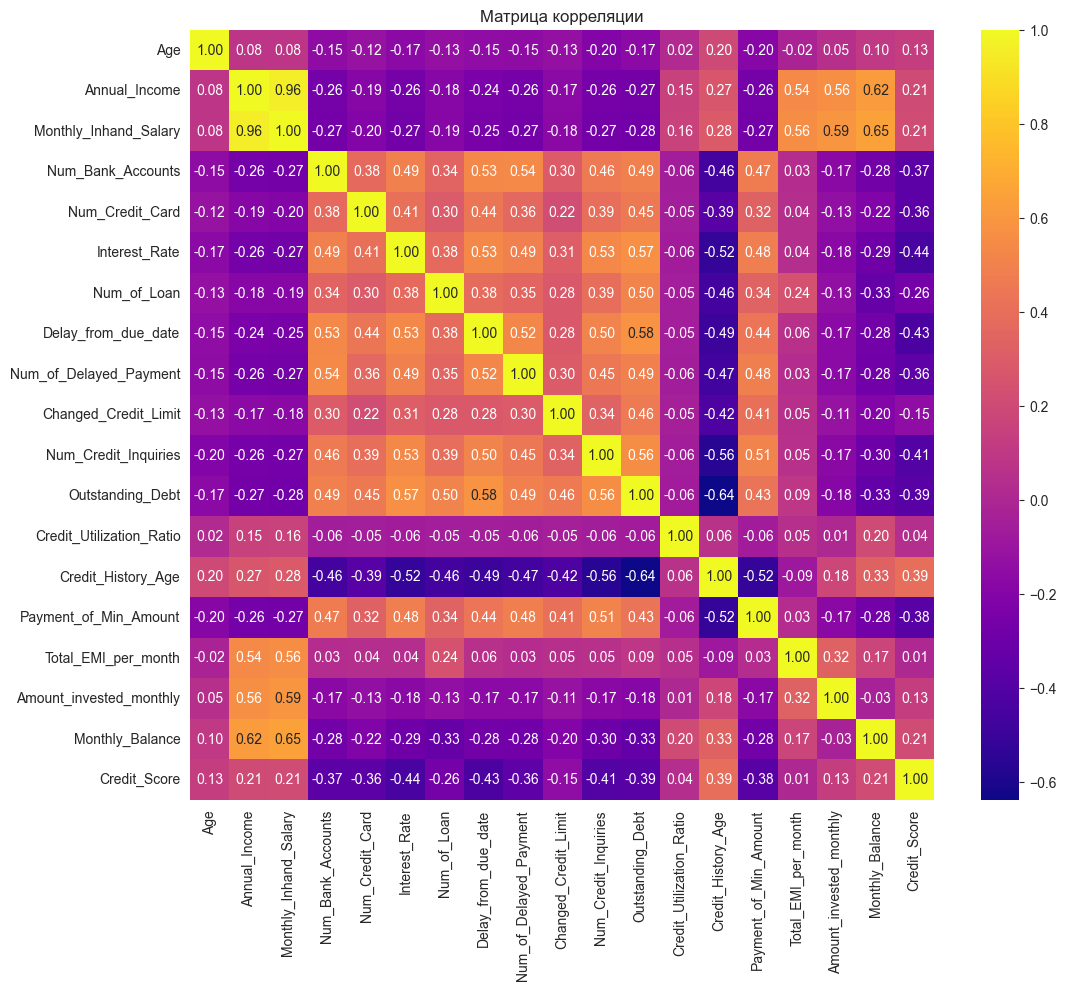

In [18]:
plt.figure(figsize=(12, 10))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="plasma")
plt.title("Матрица корреляции")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


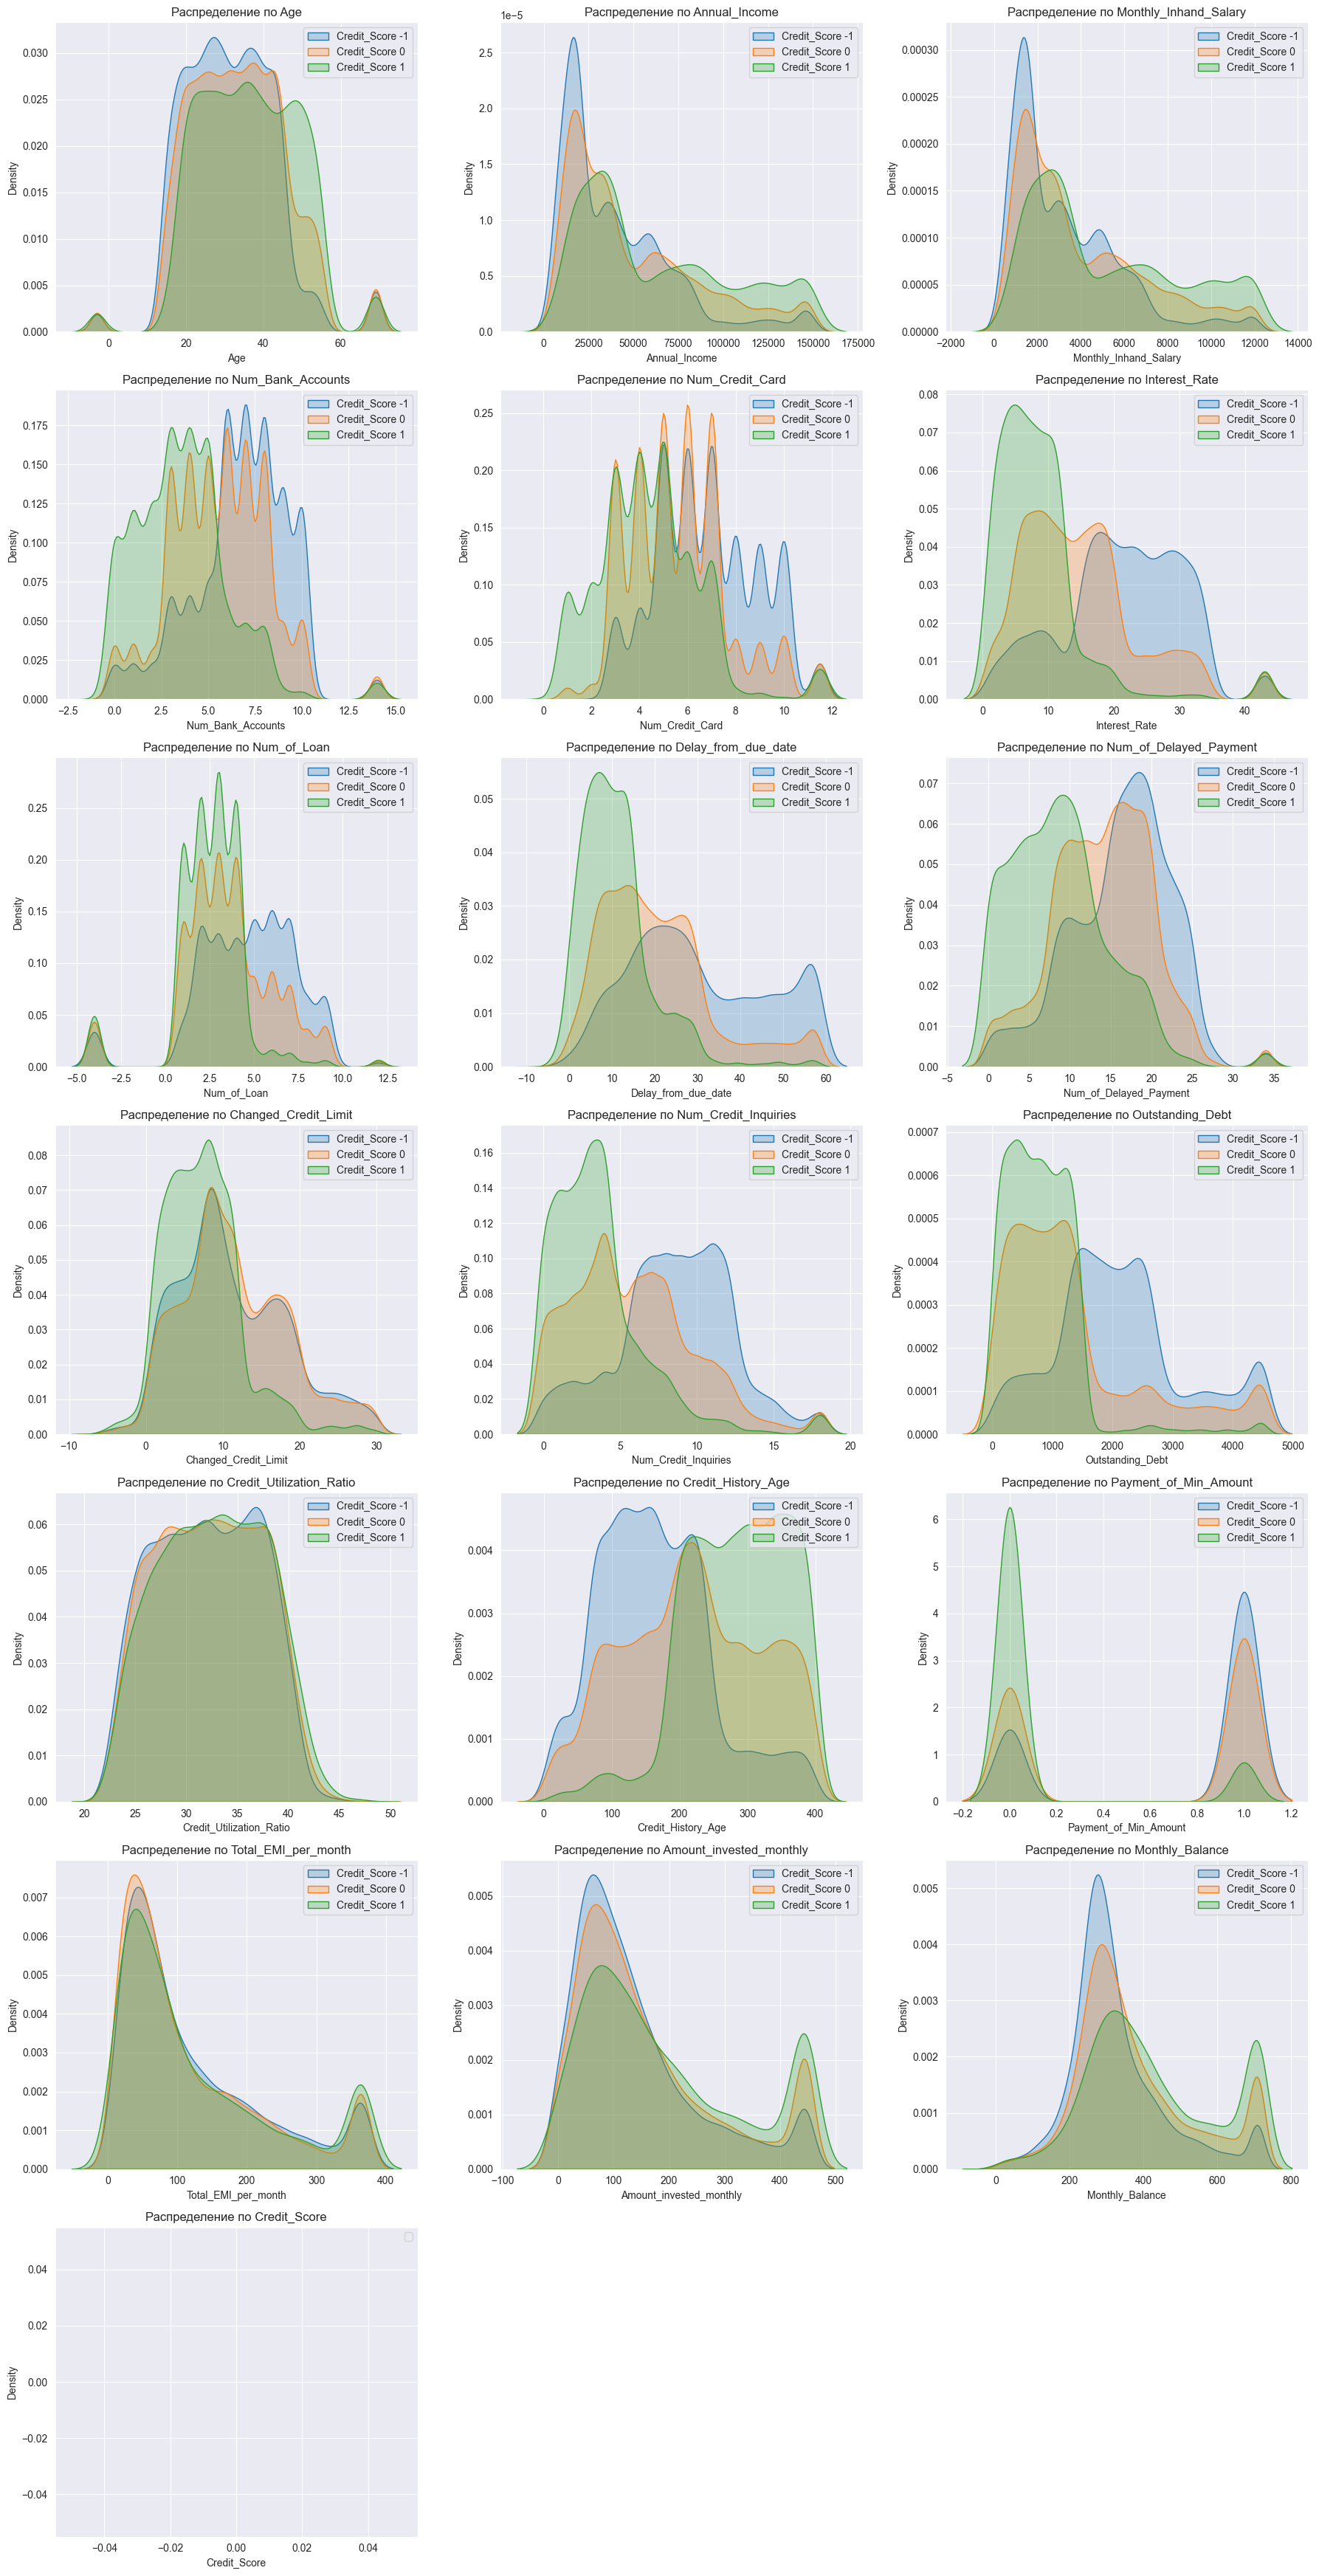

In [19]:
features = data.select_dtypes(include=[np.number]).columns

ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    for score in sorted(data['Credit_Score'].unique()):
        subset = data[data['Credit_Score'] == score]
        sns.kdeplot(data=subset, x=col, label=f'Credit_Score {score}', fill=True, ax=ax, warn_singular=False)
    ax.set_title(f'Распределение по {col}')
    ax.set_xlabel(col)
    ax.legend()
    
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Теперь обратим внимание на признаки `Type_of_Loan`, `Occupation`, `Credit_Mix`, `Payment_Behaviour`. Каждое значение в них - какая-то комбинация типов, записанная в виде одной строки. Такое представление малополезно - гораздо логичнее было бы превратить каждый тип в отдельный 0-1 признак.

In [20]:
data.sample(10).T

,37067,75326,34789,99670,74602,48115,49256,73362,83198,5278
Age,35.0,37.0,22.0,31.0,30.0,37.0,30.0,34.0,34.0,69.0
Occupation,Writer,_______,_______,Lawyer,Lawyer,Developer,Lawyer,Mechanic,Lawyer,Engineer
Annual_Income,134139.48,10021.72,16753.63,146310.68,17924.07,8475.375,23317.74,61614.58,16234.66,18721.3
Monthly_Inhand_Salary,11352.29,501.962111,1564.135833,11911.526875,1303.6725,653.28125,2109.145,5325.548333,1084.888333,1684.108333
Num_Bank_Accounts,2.0,7.0,6.0,5.0,6.0,10.0,4.0,5.0,10.0,4.0
Num_Credit_Card,5.0,8.0,9.0,4.0,10.0,7.0,5.0,5.0,5.0,5.0
Interest_Rate,11.0,32.0,23.0,9.0,31.0,29.0,12.0,10.0,21.0,28.0
Num_of_Loan,4.0,7.0,9.0,1.0,6.0,8.0,3.0,2.0,7.0,3.0
Type_of_Loan,Auto Student Mortgage Mortgage,Home Equity Payday Personal Mortgage Auto Auto,Credit-Builder Student Auto Credit-Builder Cre...,Debt Consolidation,Debt Consolidation Payday Credit-Builder Mortg...,Debt Consolidation Auto Home Equity Home Equit...,Home Equity Home Equity Student,Payday Mortgage,Personal Debt Consolidation Payday Home Equit...,Personal Personal Mortgage
Delay_from_due_date,19.0,22.0,37.0,3.0,31.0,49.0,23.0,17.0,25.0,18.0


In [21]:
def create_dummies_for_columns(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    for col in columns:
        dummies = df[col].str.get_dummies(sep=' ')
        dummies = dummies.add_prefix(f"{col}_")
        df = pd.concat([df, dummies], axis=1)
        df.drop(columns=[col], inplace=True)
    return df

In [22]:
cols_to_dummy = ['Type_of_Loan', 'Occupation', 'Credit_Mix', 'Payment_Behaviour']
data = create_dummies_for_columns(data, cols_to_dummy)

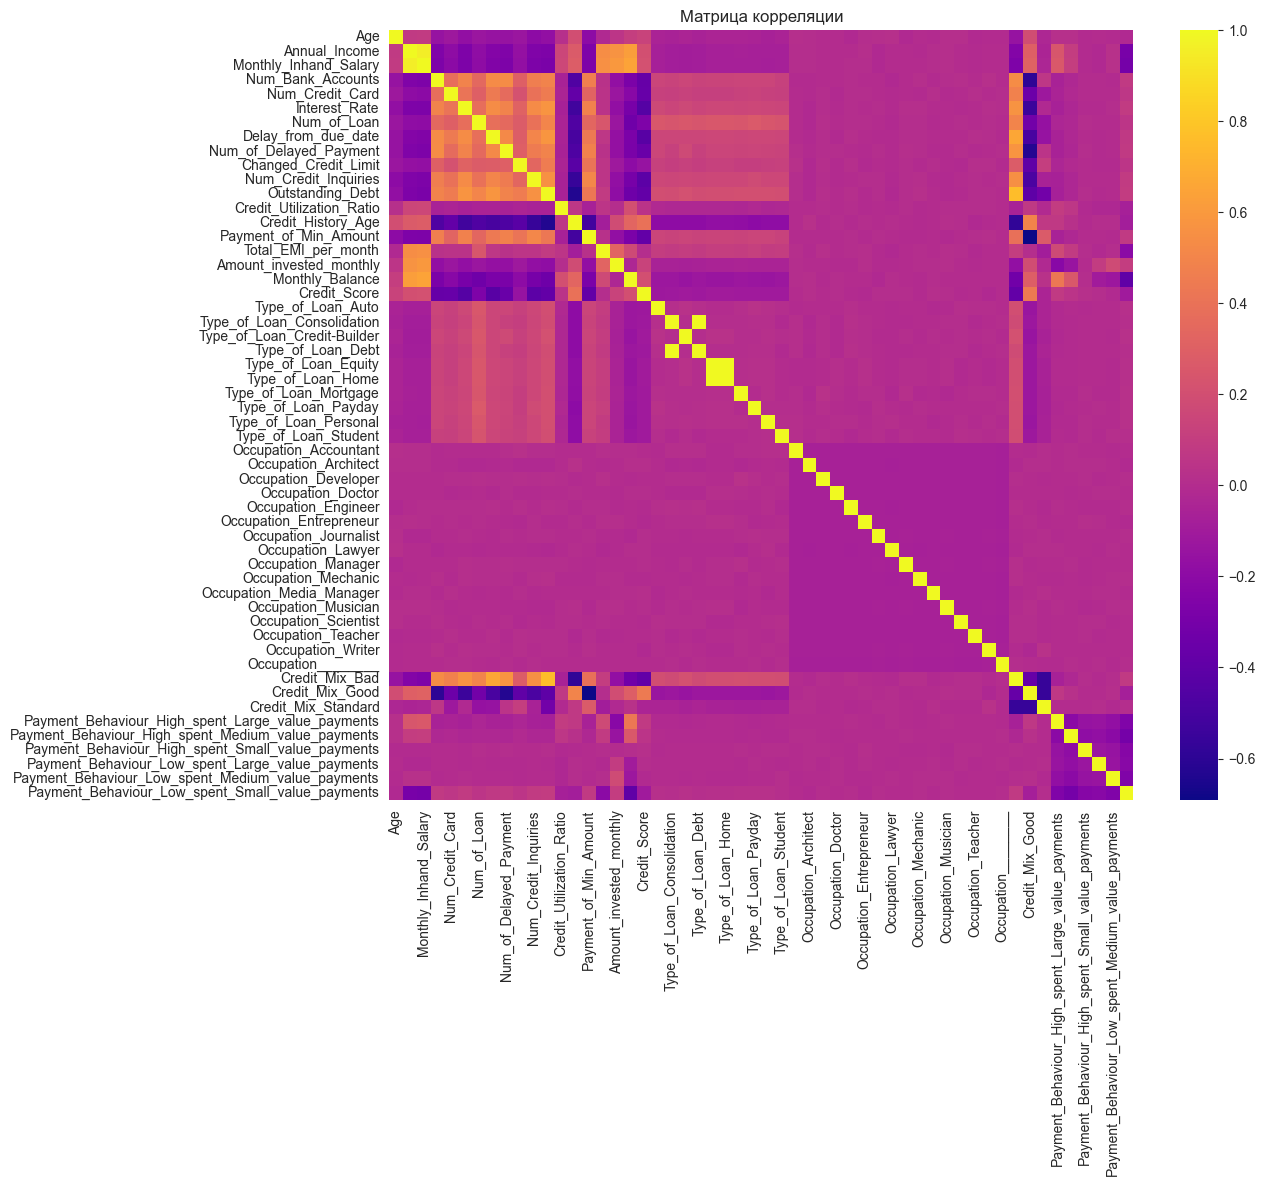

In [23]:
plt.figure(figsize=(12, 10))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap="plasma")
plt.title("Матрица корреляции")
plt.show()

## Моделирование

Данные готовы, можно приступать к моделированию.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Credit_Score']), data['Credit_Score'], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

In [26]:
logreg = LogisticRegression(max_iter=10000)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

logreg.fit(X_train_scaled, y_train)
dtc.fit(X_train_scaled, y_train)
rfc.fit(X_train_scaled, y_train)
gnb.fit(X_train_scaled, y_train)

logreg_pred = logreg.predict(X_test_scaled)
dtc_pred = dtc.predict(X_test_scaled)
rfc_pred = rfc.predict(X_test_scaled)
gnb_pred = gnb.predict(X_test_scaled)

print('Logistic Regression')
print(classification_report(y_test, logreg_pred))
print('Decision Tree Classifier')
print(classification_report(y_test, dtc_pred))
print('Random Forest Classifier')
print(classification_report(y_test, rfc_pred))
print('Gaussian Naive Bayes')
print(classification_report(y_test, gnb_pred))


Logistic Regression
              precision    recall  f1-score   support

          -1       0.64      0.56      0.60      2405
           0       0.71      0.70      0.70      4117
           1       0.53      0.68      0.59      1197

    accuracy                           0.65      7719
   macro avg       0.62      0.65      0.63      7719
weighted avg       0.66      0.65      0.65      7719

Decision Tree Classifier
              precision    recall  f1-score   support

          -1       0.66      0.68      0.67      2405
           0       0.73      0.71      0.72      4117
           1       0.58      0.60      0.59      1197

    accuracy                           0.68      7719
   macro avg       0.66      0.66      0.66      7719
weighted avg       0.68      0.68      0.68      7719

Random Forest Classifier
              precision    recall  f1-score   support

          -1       0.76      0.77      0.76      2405
           0       0.79      0.78      0.79      4117
     

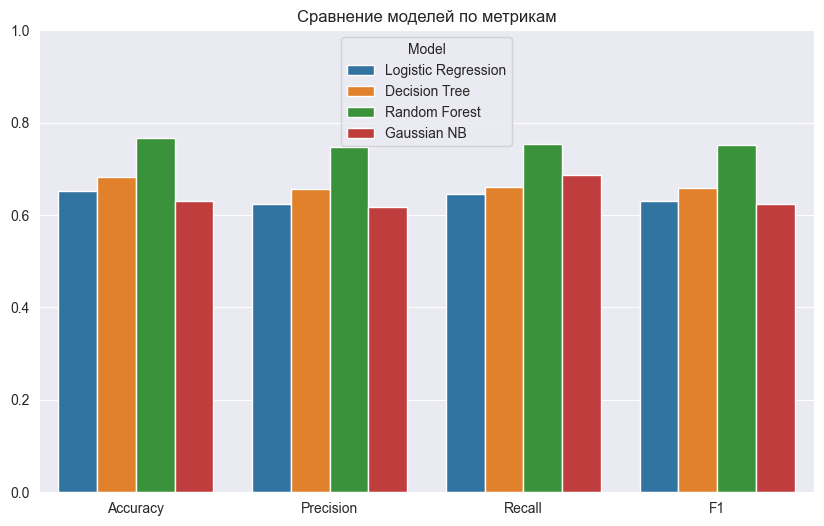

In [27]:
models = {
    "Logistic Regression": logreg_pred,
    "Decision Tree": dtc_pred,
    "Random Forest": rfc_pred,
    "Gaussian NB": gnb_pred,
}

metrics = {}
for model_name, preds in models.items():
    metrics[model_name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average="macro"),
        "Recall": recall_score(y_test, preds, average="macro"),
        "F1": f1_score(y_test, preds, average="macro")
    }

df_metrics = pd.DataFrame(metrics).T.reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")
df_metrics.rename(columns={"index": "Model"}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics, x="Metric", y="Score", hue="Model")
plt.title("Сравнение моделей по метрикам")
plt.ylim(0, 1)
plt.xlabel('')
plt.ylabel('')
plt.show()

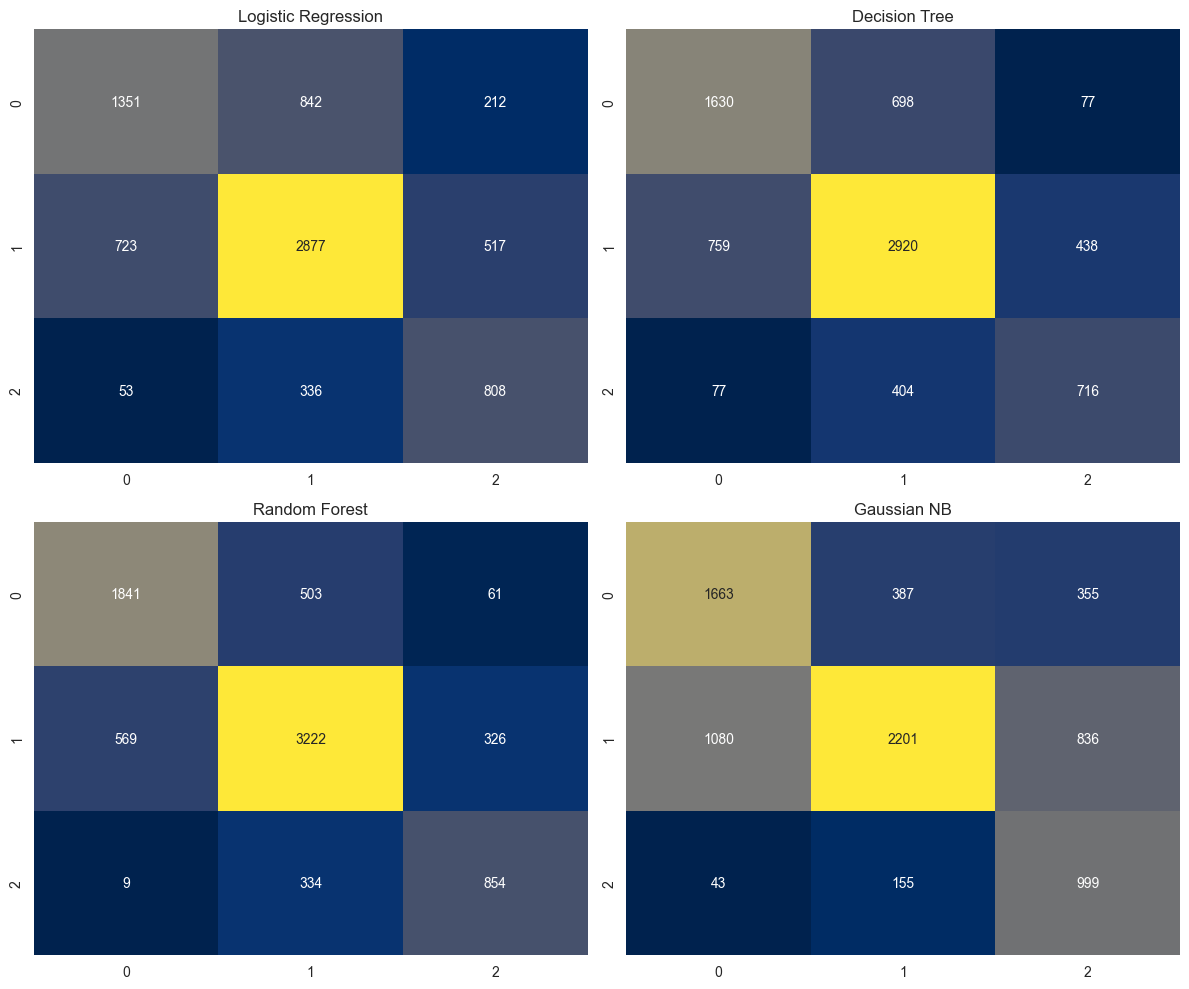

In [28]:
plt.figure(figsize=(12, 10))
for i, (model_name, preds) in enumerate(models.items(), start=1):
    cm = confusion_matrix(y_test, preds)
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", cbar=False)
    plt.title(model_name)

plt.tight_layout()
plt.show()

Как можно заметить, `Random Forest` справляется ощутимо лучше. Посмотрим, сильно ли поможет использование `CatBoost`.

In [29]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=1000, task_type="GPU", devices='0')
cat.fit(X_train_scaled, y_train)
cat_pred = cat.predict(X_test)

Learning rate set to 0.130664
0:	learn: 1.0065783	total: 25.5ms	remaining: 25.4s
1:	learn: 0.9400079	total: 35.4ms	remaining: 17.7s
2:	learn: 0.8891652	total: 44.6ms	remaining: 14.8s
3:	learn: 0.8497314	total: 53.2ms	remaining: 13.2s
4:	learn: 0.8183783	total: 62ms	remaining: 12.3s
5:	learn: 0.7924246	total: 71.2ms	remaining: 11.8s
6:	learn: 0.7717614	total: 80.2ms	remaining: 11.4s
7:	learn: 0.7539975	total: 88.7ms	remaining: 11s
8:	learn: 0.7396439	total: 97.4ms	remaining: 10.7s
9:	learn: 0.7270698	total: 106ms	remaining: 10.5s
10:	learn: 0.7165029	total: 115ms	remaining: 10.3s
11:	learn: 0.7081676	total: 124ms	remaining: 10.2s
12:	learn: 0.7006764	total: 133ms	remaining: 10.1s
13:	learn: 0.6947247	total: 142ms	remaining: 10s
14:	learn: 0.6899696	total: 151ms	remaining: 9.93s
15:	learn: 0.6851120	total: 161ms	remaining: 9.88s
16:	learn: 0.6814196	total: 169ms	remaining: 9.8s
17:	learn: 0.6780033	total: 178ms	remaining: 9.73s
18:	learn: 0.6751501	total: 188ms	remaining: 9.69s
19:	learn

CatBoost Classifier
              precision    recall  f1-score   support

          -1       0.32      0.85      0.46      2405
           0       0.38      0.10      0.16      4117
           1       0.49      0.06      0.10      1197

    accuracy                           0.33      7719
   macro avg       0.40      0.34      0.24      7719
weighted avg       0.38      0.33      0.25      7719



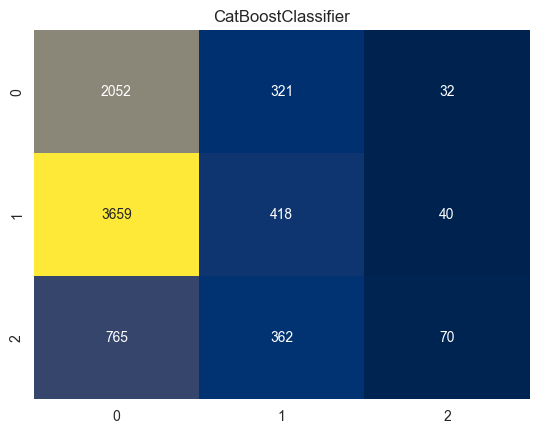

In [30]:
print('CatBoost Classifier')
print(classification_report(y_test, cat_pred))

metrics["CatBoost"] = {
    "Accuracy": accuracy_score(y_test, cat_pred),
    "Precision": precision_score(y_test, cat_pred, average="macro"),
    "Recall": recall_score(y_test, cat_pred, average="macro"),
    "F1": f1_score(y_test, cat_pred, average="macro")
}

cm = confusion_matrix(y_test, cat_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", cbar=False)
plt.title("CatBoostClassifier")

plt.show()

Займёмся теперь отбором фич и проанализируем предсказательную способность модели. Далее мы используем уже только `Random Forest` - она себя лучше всего показала. 

In [31]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rfc, prefit=True)
X_train_selected = selector.fit_transform(X_train_scaled)

X_train_selected = pd.DataFrame(X_train_selected, columns=X_train.columns[selector.get_support()])
X_test_selected = X_test[X_train_selected.columns]
X_train_selected

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard
0,-0.520163,0.358315,0.436126,-0.967513,0.532159,-0.710153,-2.839331,-0.997883,-0.756755,0.170815,-0.557578,-0.175960,-1.436419,0.726822,0.795454,-0.707528,0.846660,1.640848,-0.920667
1,0.139878,-0.433540,-0.420102,-0.600247,0.532159,2.801743,-0.639282,-0.797931,-1.679556,-0.897445,-1.522110,-0.878050,1.148658,0.126119,-0.841549,-0.499868,0.308168,1.640848,-0.920667
2,0.469899,1.771347,1.948353,0.868820,-1.250650,-0.296988,-1.005957,-0.664629,-0.602955,0.643651,-1.280977,-0.673219,0.050380,-0.094139,-0.233891,-0.512979,2.164424,-0.609441,1.086169
3,-1.427720,-0.307356,-0.266718,3.072421,0.086457,0.839213,0.094068,-0.997883,-0.295355,0.218974,-0.557578,0.424951,0.444928,-0.484596,-0.089657,0.888042,-0.942112,-0.609441,1.086169
4,-0.272648,-0.844199,-0.929310,0.134287,-0.359246,-0.193697,0.094068,-0.131424,0.012245,0.291943,-0.316444,-0.201159,0.453484,0.026002,-0.786949,-0.889225,-0.248130,-0.609441,1.086169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30867,0.387394,-0.539295,-0.479946,-0.967513,-0.359246,-1.433190,-0.272607,-0.664629,-1.064356,-2.378707,0.648088,-0.941430,1.049913,1.397608,-0.664823,0.818547,-0.854570,1.640848,-0.920667
30868,1.459960,2.239171,2.425121,-0.967513,-0.359246,-0.503571,-1.005957,-0.464677,-1.833356,-0.572005,-0.557578,-1.023646,-0.902243,1.287479,-0.406294,2.256578,0.914485,1.640848,-0.920667
30869,0.387394,-0.758761,-0.730131,-0.232980,-0.804948,-1.536481,-0.272607,-0.664629,-2.140957,0.070118,-0.798711,-0.823285,-0.903879,1.818100,-0.695979,-0.806220,-0.250547,1.640848,-0.920667
30870,1.129940,-0.015901,0.106733,0.868820,-1.250650,-1.329899,0.094068,-0.331376,-0.602955,-0.979170,-1.280977,-0.586773,-0.046744,0.066048,-0.361312,0.078178,0.400867,1.640848,-0.920667


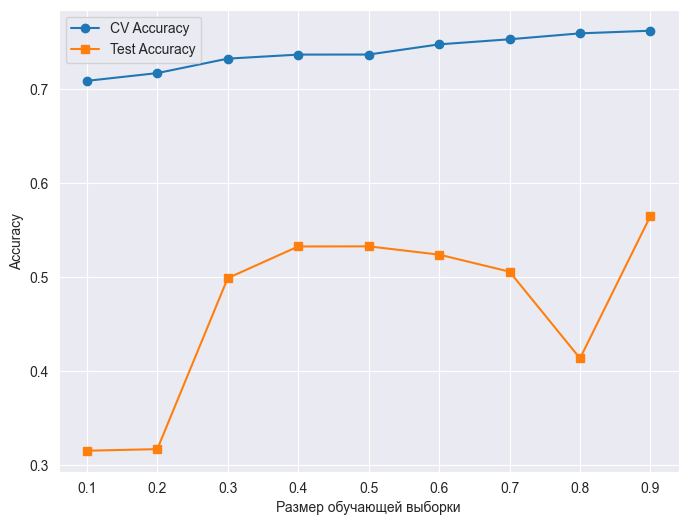

In [32]:
fractions = np.linspace(0.1, 0.9, 9)
cv_scores = []
test_accuracies = []

for frac in fractions:
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train_selected, y_train, train_size=frac, random_state=42)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(rfc, X_train_frac, y_train_frac, cv=kf, scoring="accuracy")
    cv_scores.append(np.mean(scores))
    
    rfc.fit(X_train_frac, y_train_frac)
    y_pred = rfc.predict(X_test_selected)
    test_accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(fractions, cv_scores, marker='o', label="CV Accuracy")
plt.plot(fractions, test_accuracies, marker='s', label="Test Accuracy")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()